In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [4]:
# Load the cleaned data into a data frame
file_path = Path('../cleaned_data/data_by_country.csv')
df = pd.read_csv(file_path)
#df = pd.read_csv(file_path, index_col=0)
df.head(10)      

,Unnamed: 0,Country,Literacy_Rate,Buddhists,Christians,Folk_Religions,Hindus,Jews,Muslims,Other_Religions,...,gdp_per_capita_2010,gdp_per_capita_2015,mortality_rate_2000,mortality_rate_2005,mortality_rate_2010,mortality_rate_2015,Longitude,Latitude,mortality_rate,mortality_state
0,0,Albania,96.8,1.0,18.0,1.0,1.0,1.0,80.3,1.0,...,4094.348386,3952.802538,106.10,105.70,103.50,92.24,19.999962,41.000028,9.224,1
1,1,Algeria,72.6,1.0,1.0,1.0,1.0,1.0,97.9,1.0,...,4480.786318,4177.889542,141.90,119.30,104.40,96.49,2.999983,28.000027,9.649,1
2,2,Angola,70.4,1.0,90.5,4.2,1.0,1.0,1.0,1.0,...,3497.974488,3127.890598,383.60,322.70,269.70,239.80,17.569124,-11.877577,23.980,3
3,3,Antigua and Barbuda,99.0,1.0,93.0,3.6,1.0,1.0,1.0,1.0,...,13048.960582,14285.329777,156.70,156.10,134.60,121.90,-61.955461,17.223472,12.190,2
4,4,Argentina,97.9,1.0,85.2,1.0,1.0,1.0,1.0,1.0,...,10385.964432,13789.060425,138.50,124.90,118.70,112.70,-64.967282,-34.996496,11.270,2
5,5,Armenia,99.6,1.0,98.5,1.0,1.0,1.0,1.0,1.0,...,3218.378299,3607.289299,143.40,139.70,137.90,121.30,44.673665,40.769627,12.130,2
6,6,Australia,99.0,2.7,67.3,1.0,1.4,1.0,2.4,1.0,...,52087.972289,56707.022077,76.93,68.13,63.06,62.17,134.755000,-24.776109,6.217,1
7,7,Austria,98.0,1.0,80.4,1.0,1.0,1.0,5.4,1.0,...,46903.761585,44195.817595,93.72,83.70,74.43,64.34,14.124560,47.593970,6.434,1
8,8,Azerbaijan,99.8,1.0,3.0,1.0,1.0,1.0,96.9,1.0,...,5843.533768,5500.310382,161.00,160.00,131.80,119.50,47.787251,40.393629,11.950,2
9,9,Bahrain,94.6,2.5,14.5,1.0,9.8,1.0,70.3,1.0,...,20722.070490,22634.085648,100.80,83.48,65.97,58.52,50.534461,26.155125,5.852,1


In [5]:
# Set y
y = df[['mortality_state']]

# Drop Country column - non numeric AND unneeded
# Drop Mortality Columns as we will use 1 target = mortality_rate_2015
df = df.drop(['Country','mortality_rate_2000',
              'mortality_rate_2005','mortality_rate_2010',
              'mortality_rate_2015','mortality_rate','mortality_state', 'Latitude', 'Longitude'], axis=1)
# Set X
X=df

In [6]:
# Check the balance of our target values
y['mortality_state'].value_counts()

2    58
1    42
3    39
Name: mortality_state, dtype: int64

In [7]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [8]:
print(X_train.shape)

(104, 26)


In [9]:
print(y_train.shape)

(104, 1)


# Balanced Random Forest Classifier

In [10]:
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

# Create a balanced random forest classifier.
brf_model = BalancedRandomForestClassifier(n_estimators=100, random_state=1)

# Fitting the model
brf_model = brf_model.fit(X_train, y_train)
brf_model

BalancedRandomForestClassifier(random_state=1)

In [11]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
y_pred = brf_model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.7194444444444444

In [12]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 7,  1,  0],
       [ 1, 13,  1],
       [ 0,  7,  5]], dtype=int64)

In [13]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.88      0.88      0.96      0.88      0.92      0.84         8
          2       0.62      0.87      0.60      0.72      0.72      0.53        15
          3       0.83      0.42      0.96      0.56      0.63      0.38        12

avg / total       0.75      0.71      0.81      0.70      0.74      0.55        35



# Optimizing Model-Standard Bagging Random Forest Classifier

In [14]:
# https://machinelearningmastery.com/bagging-and-random-forest-for-imbalanced-classification/

#Optimizing using SKLearn bagging 
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# Generate Dataset 
X, y= make_classification(n_samples = 100, n_features=5, 
                                  n_redundant=0, n_clusters_per_class=1, 
                                  flip_y=0, random_state=4)

# define model
brf_model_2 = BaggingClassifier()

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(brf_model_2, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.921


In [15]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [16]:
print(X_train.shape)

(75, 5)


In [17]:
print(y_train.shape)

(75,)


In [18]:
# Fitting the model
brf_model_2 = brf_model_2.fit(X_train, y_train)
brf_model_2

BaggingClassifier()

In [19]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
y_pred = brf_model_2.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.9375

In [20]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[ 9  0]
 [ 2 14]]


In [21]:
#Import libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns

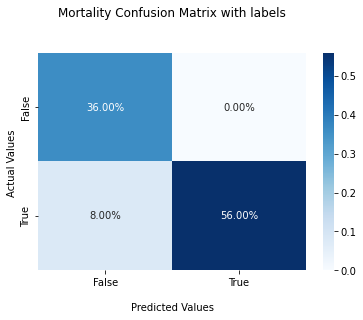

<Figure size 432x288 with 0 Axes>

In [22]:
#Plot confusion Matrix with percentages 
#https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Mortality Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

plt.savefig("mortality_confusion_matrix.jpg")

In [23]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.82      1.00      0.88      0.90      0.94      0.89         9
          1       1.00      0.88      1.00      0.93      0.94      0.86        16

avg / total       0.93      0.92      0.95      0.92      0.94      0.87        25



In [24]:
#Visualize classifcation report
# https://stackoverflow.com/questions/58801967/classification-report-using-yellowbrick

from yellowbrick.classifier import ClassificationReport

# Instantiate the classification model and visualizer
visualizer = ClassificationReport(brf_model_2, support=True, cmap="Blues")

# Fit the visualizer and the model
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test) 
visualizer.show()  

ModuleNotFoundError: No module named 'yellowbrick'

# Optimizing Model Using Roc Curce and AUC

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.978


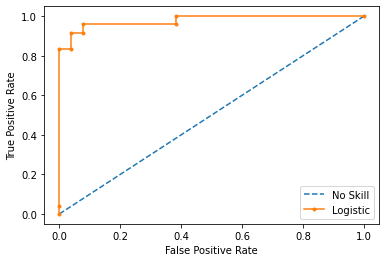

In [25]:
# https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate 2 class dataset
X, y = make_classification(n_samples=100, n_classes=2, random_state=1)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]

# fit a model
brf_model_3 = LogisticRegression(solver='lbfgs')
brf_model_3.fit(trainX, trainy)

# predict probabilities
lr_probs = brf_model_3.predict_proba(testX)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()